# Monte-Carlo simulation of possible outcomes

These simulations can show the expected variability of outcome, but the aren't useful for evaluating which predictions are best. The best performing strategy is just whichever one most closely matches whatever the assumed outcome probabilities are for the simulation.

## Set up

In [1]:
# Set up to use local modules
%load_ext autoreload
%autoreload 2
import os
import sys
module_path = os.path.abspath(os.path.join('..')) # Add parent directory to path
sys.path.insert(0, module_path)

In [2]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Local imports
from src import process
from src import plot
from src import util

In [3]:
# Load data
blind_mode_df, estimates_df = process.load_and_process_results()

# Get the values from estimates_df and convert to a numpy array
estimates_matrix = estimates_df.values
estimates_matrix = np.nan_to_num(estimates_matrix, nan=estimates_df.median())
estimates_matrix = estimates_matrix / 100

In [4]:
# Load mean super forecasters predictions
data_file = os.path.join(process.RESULTS_FOLDER, "sf_mean_predictions.csv")
sf_mean_predictions_data = pd.read_csv(data_file)
sf_mean_predictions = (sf_mean_predictions_data.values.T[0] / 100).round(2)
print("Superforecaster mean predictions:")
print(sf_mean_predictions)

# Load my predictions
data_file = os.path.join(process.RESULTS_FOLDER, "my_final_predictions.csv")
my_predictions_data = pd.read_csv(data_file)
my_predictions = my_predictions_data.values.T[0] / 100
print("My predictions:")
print(my_predictions)

Superforecaster mean predictions:
[0.83 0.23 0.34 0.7  0.41 0.31 0.26 0.22 0.08 0.12 0.71 0.31 0.17 0.54
 0.64 0.16 0.4  0.47 0.64 0.31 0.48 0.23 0.46 0.2  0.7  0.29 0.8  0.41
 0.56 0.55 0.58 0.35 0.59 0.48 0.3  0.42 0.57 0.4  0.69 0.7  0.55 0.46
 0.45 0.56 0.28 0.39 0.43 0.31 0.43 0.57]
My predictions:
[0.97 0.08 0.22 0.86 0.32 0.16 0.09 0.05 0.01 0.01 0.86 0.16 0.03 0.58
 0.77 0.03 0.3  0.44 0.78 0.15 0.47 0.07 0.39 0.04 0.85 0.13 0.95 0.33
 0.61 0.63 0.7  0.21 0.65 0.47 0.13 0.34 0.64 0.28 0.85 0.84 0.63 0.43
 0.41 0.58 0.12 0.28 0.34 0.15 0.35 0.62]


## Simulate comparison of two sets of predictions

Mean Brier score for SF predictions:  0.216
Mean Brier score for my predictions:  0.231


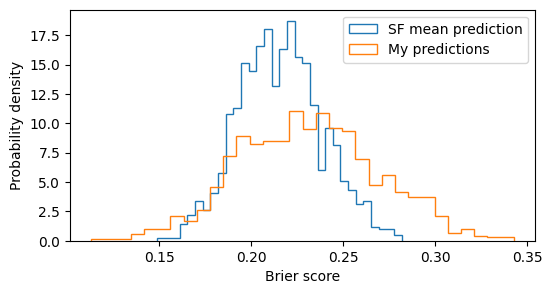

Mean Brier score percentile:  36.9


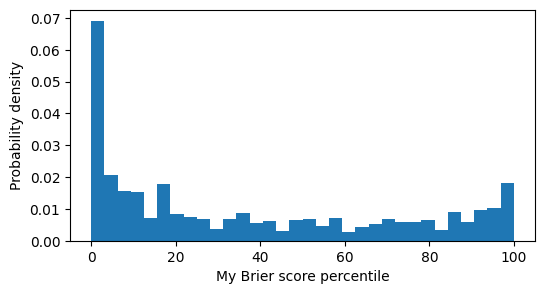

In [5]:
# Simulate outcomes, using Super forcaster predictions as probabilities

# Run Monte Carlo simulation
n_simulations = 1000
my_brier_scores, base_brier_scores, my_score_percentiles = util.sim_binary_comparison(
    n_simulations, my_predictions, sf_mean_predictions, base_preds_are_probs=True
)


# Histogram of brier scores
# Note: lower is better for brier scores
fig = plot.sim_outcome_dist(my_brier_scores, base_brier_scores, print_stats=True)
plt.show()

# Histogram of brier score  percentiles
fig = plot.sim_outcome_prct_dist(my_score_percentiles, print_stats=True)
plt.show()

Mean Brier score for SF predictions:  0.172
Mean Brier score for my predictions:  0.158


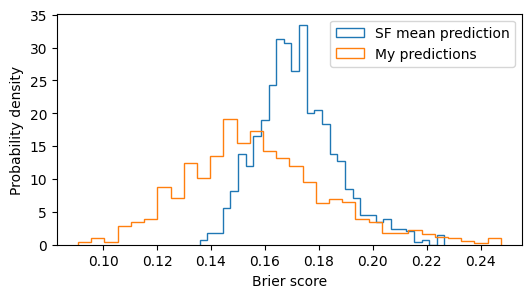

Mean Brier score percentile:  70.6


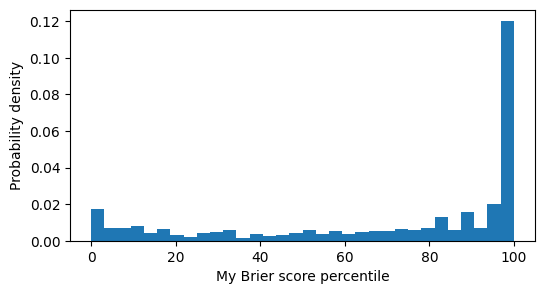

In [6]:
# Simulate outcomes, using my predictions as probabilities

# Run Monte Carlo simulation
n_simulations = 1000
my_brier_scores, base_brier_scores, my_score_percentiles = util.sim_binary_comparison(
    n_simulations, my_predictions, sf_mean_predictions, base_preds_are_probs=False
)

# Histogram of brier scores
# Note: lower is better for brier scores
fig = plot.sim_outcome_dist(my_brier_scores, base_brier_scores, print_stats=True)
plt.show()

# Histogram of brier score  percentiles
fig = plot.sim_outcome_prct_dist(my_score_percentiles, print_stats=True)
plt.show()

## Simulation comparison of all Blind Mode participants

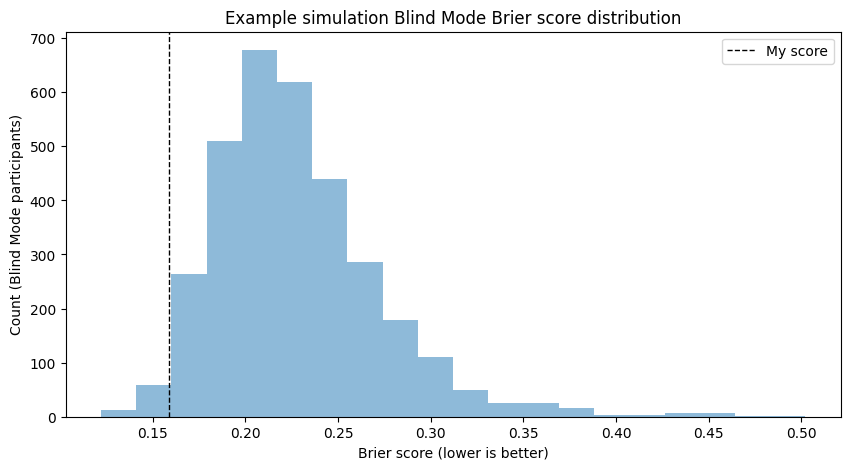

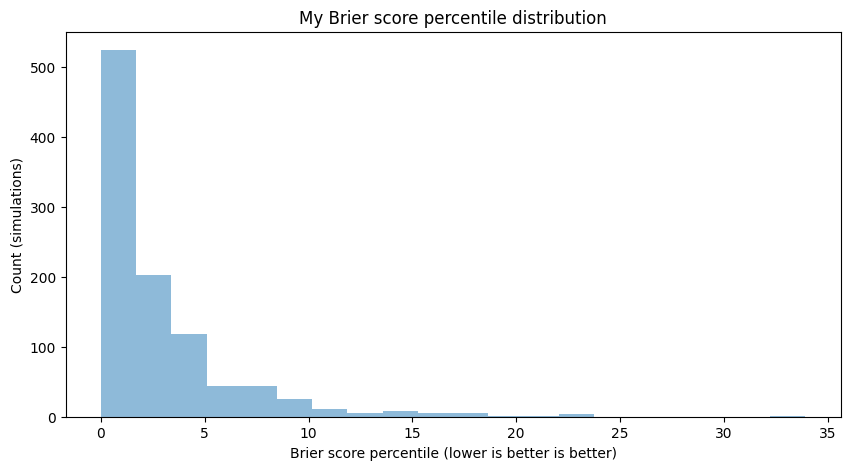

In [7]:
# Conclusion: even with perfect calibration, I probably wouldn't even win the Blind Mode

(
    my_brier_score,
    blind_mode_scores,
    my_brier_score_percentile,
) = util.sim_blind_mode_comparison(my_predictions, estimates_matrix)

# Plot histogram of the last simulation
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111)
hist = ax.hist(blind_mode_scores, bins=20, alpha=0.5, label="Blind mode")
line = ax.axvline(my_brier_score, color="k", linestyle="dashed", linewidth=1)
ax.set_xlabel("Brier score (lower is better)")
ax.set_ylabel("Count (Blind Mode participants)")
ax.set_title("Example simulation Blind Mode Brier score distribution")
ax.legend([line], ["My score"])
plt.show()

# Plot histogram of my score percentile across all simulations
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111)
hist = ax.hist(my_brier_score_percentile, bins=20, alpha=0.5)
ax.set_xlabel("Brier score percentile (lower is better is better)")
ax.set_ylabel("Count (simulations)")
ax.set_title("My Brier score percentile distribution")
plt.show()